
# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [87]:
#Import different libraries for the homework and set the context of the notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import glob


sns.set_context('notebook')
%matplotlib inline
mpl.rcParams['figure.figsize'] = (15,5)
mpl.rcParams['figure.dpi'] = 100

In [88]:
DATA_FOLDER = './Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

### Answer

For this exercice, we had to calculate for each country, the daily average per month of new cases and deaths. In order to do that, we checked for each country how the data was organized and we immediatly saw that there was clearly three differents approach. We also had to import these data files into a single Dataframe.

First, we took the three countries apart and we 'cleansed' the data (by cleaning we mean that we change all the *NaN* values to 0 or we keep just the values that are useful for our analysis) and we 'harmonized' the three parts to concatenate them properly and to be sure that the data are easily readable by us and other people.

We made the assumptions that *NaN* values meant that there was no new case/death on this day.

- For Guinea we decided to keep the 'Total new cases registered so far' and the 'Total deaths (confirmed + probables + suspects)' data entry of each report since they were the more relevant for our analysis. 

- For Sierra Leone it was more difficult because there were some missing values and there was not a Total death cell anymore. We decided to sum the death_confirmed, death_probable and death_suspected cells for the deaths and we did the same for the new declared cases.

- For Liberia the situation was a bit different because we added the 'Total deaths (confirmed + probables + suspects)' for the deaths but not for the new cases, so again we summed the cells for the cases. 

Finally we merged all the relevant data into a single Dataframe with unique index. We then computed some values of interest concerning the disease evolution.

In [89]:
#Guinea part
#Here we construct the cleaned Guinea data frame

#take all the data about guinea
guinea_path = r'Data/ebola/guinea_data/'
guinea_files = glob.glob(guinea_path + "/*.csv")

#take all the frames and concatanate them into one, we take the Date as datetime 
guinea_df = pd.DataFrame()
for file in guinea_files:
    df = pd.read_csv(file,parse_dates=['Date'])
    guinea_df = pd.concat([guinea_df,df])
    
guinea_df = guinea_df[['Date', 'Description', 'Totals']]


#we extract the new cases and deaths for guinea
guinea_new_case_col = guinea_df.loc[ guinea_df['Description'] == 'Total new cases registered so far']
guinea_new_case_col = guinea_new_case_col[['Date','Totals']]
guinea_new_case_col.columns=['Date','Total new cases registered']

guinea_new_death_col = guinea_df.loc[ guinea_df['Description'] == 'Total deaths (confirmed + probables + suspects)']
guinea_new_death_col = guinea_new_death_col[['Date','Totals']]
guinea_new_death_col.columns=['Date','Total deaths confirmed']


#we merge the two column into one with the dates already in and we add a Country attribute
guinea = pd.merge(guinea_new_case_col,guinea_new_death_col)
guinea['Country'] = 'Guinea'

helper_guinea = guinea.copy()
#we delete dataframes that are not used after
del guinea, guinea_df

helper_guinea

,Date,Total new cases registered,Total deaths confirmed,Country
0,2014-08-04,9,363,Guinea
1,2014-08-26,28,958,Guinea
2,2014-08-27,22,438,Guinea
3,2014-08-30,24,468,Guinea
4,2014-08-31,46,489,Guinea
5,2014-09-02,25,501,Guinea
6,2014-09-04,30,522,Guinea
7,2014-09-07,16,557,Guinea
8,2014-09-08,16,557,Guinea
9,2014-09-09,16,565,Guinea


In [90]:
#Sierra Leone part
#Here we construct the cleaned Sierra Leone data frame

#take all the data about SL
sl_path =r'Data/ebola/sl_data/'
sl_files = glob.glob(sl_path + "/*.csv")
sl_df = pd.DataFrame()

#construct the data frame with the same column's name as guinea to be consistant. 
for file in sl_files:
    df = pd.read_csv(file, parse_dates=['date'])
    sl_df = pd.concat([sl_df,df])
    
sl_df = sl_df[['date','variable','National']]
sl_df.columns = ['Date' , 'Description' , 'Totals']


#as said before we summ the new_confirmed/probable/suspected cells to obtain the real number of
#new cases for SL
sl_new_case_col_1 = sl_df.loc[ sl_df['Description'] == 'new_confirmed']
sl_new_case_col_1 = sl_new_case_col_1.fillna(0)
sl_new_case_col_2 = sl_df.loc[ sl_df['Description'] == 'new_probable']
sl_new_case_col_2 = sl_new_case_col_2.fillna(0)
sl_new_case_col_3 = sl_df.loc[ sl_df['Description'] == 'new_suspected']
sl_new_case_col_3 = sl_new_case_col_3.fillna(0)

new_cases_registered =  [int(a) + int(b) + int(c) for a,b,c in zip(sl_new_case_col_1.Totals,sl_new_case_col_2.Totals,sl_new_case_col_3.Totals)]
sl_new_case_col_1['Total new cases registered'] = new_cases_registered
sl_new_case_col_1 = sl_new_case_col_1[['Date','Total new cases registered']]

#We do the same thing to the deaths:
sl_new_death_col_1 = sl_df.loc[ sl_df['Description'] == 'death_confirmed']
sl_new_death_col_1 = sl_new_death_col_1.fillna(0)
sl_new_death_col_2 = sl_df.loc[ sl_df['Description'] == 'death_probable']
sl_new_death_col_2 = sl_new_death_col_2.fillna(0)
sl_new_death_col_3 = sl_df.loc[ sl_df['Description'] == 'death_suspected']
sl_new_death_col_3 = sl_new_death_col_3.fillna(0)

new_deaths_registered =  [int(a) + int(b) + int(c) for a,b,c in zip(sl_new_death_col_1.Totals,sl_new_death_col_2.Totals,sl_new_death_col_3.Totals)]
sl_new_death_col_1['Total deaths confirmed'] = new_deaths_registered
sl_new_death_col_1 = sl_new_death_col_1[['Date','Total deaths confirmed']]


#we merge the two columns and again add the country part
sl = pd.merge(sl_new_case_col_1,sl_new_death_col_1)
sl['Country'] = 'Sierra Leone'

helper_sl = sl.copy()
#we delete dataframes that are not used after
del sl_df, sl

helper_sl

,Date,Total new cases registered,Total deaths confirmed,Country
0,2014-08-12,22,303,Sierra Leone
1,2014-08-13,19,312,Sierra Leone
2,2014-08-14,15,319,Sierra Leone
3,2014-08-15,17,326,Sierra Leone
4,2014-08-16,21,336,Sierra Leone
5,2014-08-17,3,344,Sierra Leone
6,2014-08-18,60,351,Sierra Leone
7,2014-08-19,28,359,Sierra Leone
8,2014-08-20,5,361,Sierra Leone
9,2014-08-21,9,371,Sierra Leone


In [91]:
#Liberia part
#Here we construct the cleaned Liberia data frame

#take all the data about Liberia
lib_path =r'Data/ebola/liberia_data/'
lib_files = glob.glob(lib_path + "/*.csv")
lib_df = pd.DataFrame()

for file in lib_files:
    df = pd.read_csv(file,parse_dates=['Date'])
    lib_df = pd.concat([lib_df,df])

    
#again we use the same name as the two previous dataframes in order to merge them later
lib_df = lib_df[['Date','Variable','National']]
lib_df.columns = ['Date' , 'Description' , 'Totals']

#For Liberia we decide to add the supected, probable and confirmed new cases 
lib_new_case_col_1 = lib_df.loc[ lib_df['Description'] == 'New Case/s (Suspected)']
lib_new_case_col_1 = lib_new_case_col_1.fillna(0)
lib_new_case_col_2 = lib_df.loc[ lib_df['Description'] == 'New Case/s (Probable)']
lib_new_case_col_2 = lib_new_case_col_2.fillna(0)
lib_new_case_col_3 = lib_df.loc[ lib_df['Description'] == 'New case/s (confirmed)']
lib_new_case_col_3 = lib_new_case_col_3.fillna(0)

new_cases_registered =  [int(a) + int(b) + int(c) for a,b,c in zip(lib_new_case_col_1.Totals,lib_new_case_col_2.Totals,lib_new_case_col_3.Totals)]
lib_new_case_col_1['Total new cases registered'] = new_cases_registered
lib_new_case_col_1 = lib_new_case_col_1[['Date','Total new cases registered']]

lib_new_death_col_1 = lib_df.loc[ lib_df['Description'] == 'Total death/s in confirmed, probable, suspected cases']
lib_new_death_col_1 = lib_new_death_col_1.fillna(0)
lib_new_death_col_1.columns = ['Date' , 'Description' , 'Totals']
lib_new_death_col_1 = lib_new_death_col_1[['Date','Totals']]
lib_new_death_col_1.columns=['Date', 'Total deaths confirmed']
lib_new_death_col_1 = lib_new_death_col_1[['Date','Total deaths confirmed']]

#we merge deaths and cases and add the country
lib = pd.merge(lib_new_case_col_1,lib_new_death_col_1)
lib['Country'] = 'Liberia'

helper_lib = lib.copy()
#we delete dataframes that are not used after
del lib_df, lib

helper_lib

,Date,Total new cases registered,Total deaths confirmed,Country
0,2014-06-16,4,16.0,Liberia
1,2014-06-17,2,16.0,Liberia
2,2014-06-22,10,25.0,Liberia
3,2014-06-24,6,32.0,Liberia
4,2014-06-25,7,37.0,Liberia
5,2014-06-28,9,49.0,Liberia
6,2014-06-29,2,49.0,Liberia
7,2014-07-01,4,61.0,Liberia
8,2014-07-02,4,66.0,Liberia
9,2014-07-03,4,70.0,Liberia


In [92]:
#finally we obtain the single dataframe with all the accurate and clear data:
df = pd.concat([helper_lib,helper_sl,helper_guinea])

df = df.set_index(['Country','Date'])

# We check and drop the duplicates row. There is only one which is a double entry for the total deaths for Liberia 
# for one date (10/04/14). We decided to keep the first value.
df = df[~df.index.duplicated(keep='first')]

print("Is index unique ? " + str(df.index.is_unique))
df

Is index unique ? True


Total new cases registered Total deaths confirmed
Country      Date                                                        
Liberia      2014-06-16                          4                     16
             2014-06-17                          2                     16
             2014-06-22                         10                     25
             2014-06-24                          6                     32
             2014-06-25                          7                     37
             2014-06-28                          9                     49
             2014-06-29                          2                     49
             2014-07-01                          4                     61
             2014-07-02                          4                     66
             2014-07-03                          4                     70
             2014-07-07                          7                     78
             2014-07-08                          3                     80
             2014-07-10                          3                     85
             2014-07-13                          5                     94
             2014-07-17                         10                    108
             2014-07-20                          3                    116
             2014-07-24                         32                    136
             2014-07-26                         19                    145
             2014-08-02                         11                    257
             2014-08-04                         10                    271
             2014-08-12                         60                    365
             2014-08-15                         19                    455
             2014-08-17                         24                    481
             2014-08-18                         56                    565
             2014-08-20                         65                    613
             2014-08-25                         29                    771
             2014-08-28                         61                    885
             2014-09-01                         73                   1004
             2014-09-02                         76                   1051
             2014-09-03                         24                   1078
...                                            ...                    ...
Sierra Leone 2014-11-24                        115                   1763
             2014-11-28                        110                   1847
             2014-11-29                         88                   1862
             2014-12-01                         86                   1915
             2014-12-04                         41                   2014
             2014-12-05                         78                   2035
             2014-12-06                          0                   2074
             2014-12-13                          0                      0
Guinea       2014-08-04                          9                    363
             2014-08-26                         28                    958
             2014-08-27                         22                    438
             2014-08-30                         24                    468
             2014-08-31                         46                    489
             2014-09-02                         25                    501
             2014-09-04                         30                    522
             2014-09-07                         16                    557
             2014-09-08                         16                    557
             2014-09-09                         16                    565
             2014-09-11                         22                    568
             2014-09-14                         25                    595
             2014-09-16                         10                    608
             2014-09-17     

In [93]:
# We reset the index to allow us to keep only the month in the date field for futur groupby
df = df.reset_index(level = None)
dates = [calendar.month_name[x.month] for x in df.Date]
df['Date'] = dates
df = df.set_index(['Country','Date'])

### Computations for Guinea

In [94]:
#Here we calculate the daily average per month of new cases, we sum all the values per month and we decide to 
#divide them by the number of reports we had for each month (for example we had 5 reports in August so we divide by 5)

#declaration of variables, nb is the number of report we had per month
helper_guinea =  df.loc['Guinea']
helper_guinea = helper_guinea.reset_index()
cases_per_month_guinea = []
nb = helper_guinea['Date'].value_counts(sort = False).reindex(pd.unique(helper_guinea.Date)).tolist()
name_month_guinea = helper_guinea.Date.unique().tolist()

#We group the dataframe by Date 
a = helper_guinea.loc[:, 'Date':'Total new cases registered'].groupby('Date',sort=False)

#for each date we compute the sum of the cases
for i in a:
    cases_per_month_guinea.append(i[1]['Total new cases registered'].apply(pd.to_numeric).sum())

#We divide by the number of reports
cases_guinea = [a/b for a,b in zip(cases_per_month_guinea,nb)]

#Print the solution
for i in range(len(cases_guinea)):
    print("The daily average of new cases in Guinea in %s is %.2f." % (name_month_guinea[i],cases_guinea[i]))

The daily average of new cases in Guinea in August is 25.80.
The daily average of new cases in Guinea in September is 19.62.
The daily average of new cases in Guinea in October is 34.00.


In [95]:
#Here we calculate the daily average per month of deaths

#declaration of variables 
previous = None
first_oc = []
last_oc = []
first_val = []
last_val = []
nb_day = helper_guinea['Date'].value_counts(sort = False).reindex(pd.unique(helper_guinea.Date)).tolist()

#The number of deaths in this dataframe is cumulative, that means that we have to take the last available value 
#and substract this value by the first available value (for august we have 489 - 363 deaths ) For october
#we had only one report and we decide to not take count of it because this is not accurate.

for i in range(helper_guinea.Date.size):
    tmp = helper_guinea['Date'][i]
    if(tmp != previous):
        first_oc.append(i)
        if(i!=0):
            tmp_day = 0
            last_oc.append(i-1)
        previous = tmp
    if(i == helper_guinea.Date.size-1):
        last_oc.append(i)
        
for i in range(len(first_oc)):
    ind_first = first_oc[i]
    ind_last = last_oc[i]
    first_val.append(helper_guinea['Total deaths confirmed'][ind_first])
    last_val.append(helper_guinea['Total deaths confirmed'][ind_last])
    


#Compute the values
values = [int(a) - int(b) for a,b in zip(last_val,first_val)]
final_values = [a/b for a,b in zip(values,nb_day)]
final_values_guinea = [np.NaN if x==0 else x for x in final_values]

#print the values
for i in range(len(cases_guinea)):
    print("The daily average of deaths in Guinea in %s is %.2f." % (name_month_guinea[i],final_values_guinea[i]))

The daily average of deaths in Guinea in August is 25.20.
The daily average of deaths in Guinea in September is 13.31.
The daily average of deaths in Guinea in October is nan.


### Computations for Sierra Leone

In [96]:
#Here we calculate the daily average per month of new cases as previously

#declaration of variables, nb is the number of report we had per month
cases_per_month_sl = []
helper_sl =  df.loc['Sierra Leone']
helper_sl = helper_sl.reset_index()
nb = helper_sl['Date'].value_counts(sort = False).reindex(pd.unique(helper_sl.Date)).tolist()
name_month_sl = helper_sl.Date.unique().tolist()

#We group the dataframe by Date 
a = helper_sl.loc[:, 'Date':'Total new cases registered'].groupby('Date',sort=False)

#for each date we compute the sum of the cases
for i in a:
    cases_per_month_sl.append(i[1]['Total new cases registered'].apply(pd.to_numeric).sum())

#We divide by the number of reports
cases_sl = [a/b for a,b in zip(cases_per_month_sl,nb)]


#Print the solution
for i in range(len(cases_sl)):
    print("The daily average of new cases in Sierra Leone in %s is %.2f." % (name_month_sl[i],cases_sl[i]))

The daily average of new cases in Sierra Leone in August is 25.15.
The daily average of new cases in Sierra Leone in September is 40.69.
The daily average of new cases in Sierra Leone in October is 70.93.
The daily average of new cases in Sierra Leone in November is 75.24.
The daily average of new cases in Sierra Leone in December is 41.00.


In [97]:
#Here we calculate the daily average per month of deaths
previous = None
first_oc = []
last_oc = []
first_val = []
last_val = []
nb_day = helper_sl['Date'].value_counts(sort = False).reindex(pd.unique(helper_sl.Date)).tolist()

#we use the same technique as before, note that we could create a function or use df.first() and df.last()
for i in range(helper_sl.Date.size):
    tmp = helper_sl['Date'][i]
    if(tmp != previous):
        first_oc.append(i)
        if(i!=0):
            tmp_day = 0
            last_oc.append(i-1)
    previous = tmp
    if(i == helper_sl.Date.size-1):
        if(helper_sl['Total deaths confirmed'][i] == 0):
            last_oc.append(i-1)
        else:
            last_oc.append(i)
for i in range(len(first_oc)):
    ind_first = first_oc[i]
    ind_last = last_oc[i]
    first_val.append(helper_sl['Total deaths confirmed'][ind_first])
    last_val.append(helper_sl['Total deaths confirmed'][ind_last])
    

#we compute the values
values = [int(a) - int(b) for a,b in zip(last_val,first_val)]
final_values = [a/b for a,b in zip(values,nb_day)]
final_values_sl = [np.NaN if x==0 else x for x in final_values]

#print the values
for i in range(len(cases_sl)):
    print("The daily average of deaths in Sierre Leone in %s is %.2f." % (name_month_sl[i],final_values_sl[i]))

The daily average of deaths in Sierre Leone in August is 6.60.
The daily average of deaths in Sierre Leone in September is 5.31.
The daily average of deaths in Sierre Leone in October is 30.54.
The daily average of deaths in Sierre Leone in November is 20.00.
The daily average of deaths in Sierre Leone in December is 31.80.


### Computations for Liberia

In [98]:
#Here we calculate the daily average per month of new cases as previously

#declaration of variables, nb is the number of report we had per month
cases_per_month_lib = []
helper_lib =  df.loc['Liberia']
helper_lib = helper_lib.reset_index()
nb = helper_lib['Date'].value_counts(sort = False).reindex(pd.unique(helper_lib.Date)).tolist()
name_month_lib = helper_lib.Date.unique().tolist()

#We group the dataframe by Date 
a = helper_lib.loc[:, 'Date':'Total new cases registered'].groupby('Date',sort=False)

#for each date we compute the sum of the cases
for i in a:
    cases_per_month_lib.append(i[1]['Total new cases registered'].apply(pd.to_numeric).sum())

#We divide by the number of reports
cases_lib = [a/b for a,b in zip(cases_per_month_lib,nb)]


#Print the solution
for i in range(len(cases_lib)):
    print("The daily average of new cases in Liberia in %s is %.2f." % (name_month_lib[i],cases_lib[i]))

The daily average of new cases in Liberia in June is 5.71.
The daily average of new cases in Liberia in July is 8.55.
The daily average of new cases in Liberia in August is 37.22.
The daily average of new cases in Liberia in September is 63.83.
The daily average of new cases in Liberia in October is 46.91.
The daily average of new cases in Liberia in November is 27.00.


In [99]:
#here we calculate the daily average of deaths

#declaration of variables 
previous = None
first_oc = []
last_oc = []
first_val = []
last_val = []
nb_day = helper_lib['Date'].value_counts(sort = False).reindex(pd.unique(helper_lib.Date)).tolist()

#same
for i in range(helper_lib.Date.size):
    tmp = helper_lib['Date'][i]
    if(tmp != previous):
        first_oc.append(i)
        if(i!=0):
            tmp_day = 0
            last_oc.append(i-1)
    previous = tmp
    if(i == helper_lib.Date.size-1):
            last_oc.append(i)
for i in range(len(first_oc)):
    ind_first = first_oc[i]
    ind_last = last_oc[i]
    first_val.append(helper_lib['Total deaths confirmed'][ind_first])
    last_val.append(helper_lib['Total deaths confirmed'][ind_last])

#we compute the values
values = [int(a) - int(b) for a,b in zip(last_val,first_val)]
final_values = [a/b for a,b in zip(values,nb_day)]
final_values_lib = [np.NaN if x==0 else x for x in final_values]

#print the values
for i in range(len(cases_lib)):
    print("The daily average of deaths in Liberia in %s is %.2f." % (name_month_lib[i],final_values_lib[i]))

The daily average of deaths in Liberia in June is 4.71.
The daily average of deaths in Liberia in July is 7.64.
The daily average of deaths in Liberia in August is 69.78.
The daily average of deaths in Liberia in September is 43.92.
The daily average of deaths in Liberia in October is 24.09.
The daily average of deaths in Liberia in November is nan.


### Results vizualisation

In [100]:
# To Vizualise the results, we build a dataframe for the new deaths data and for the new cases data
# For this, we need to create vectors containing the values of new cases and deaths for the months were theese values exist
# When theese values do not exist, we put a NaN value

# We build the list of months were the disease was recorded
set_name_guinea = set(name_month_guinea)
set_name_lib = set(name_month_lib)
set_name_sl = set(name_month_sl)

all_months_names = name_month_guinea + list(set_name_lib - set_name_guinea) + list(set_name_sl - set_name_guinea -set_name_lib)

# We sort the list in the order of the month in a year
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
all_months_names.sort(key=lambda x: months.index(x.split('_')[0]))

# We initialize numpy vectors for storing the values
tmpsize = len(all_months_names)
guinea_death, lib_death, sl_death = np.full([tmpsize], np.nan), np.full([tmpsize], np.nan), np.full([tmpsize], np.nan)
guinea_cases, lib_cases, sl_cases = np.full([tmpsize], np.nan), np.full([tmpsize], np.nan), np.full([tmpsize], np.nan)

# If we have a value for a month, we put it in the corresponding place in the vectors
for i, month in enumerate(all_months_names):
    for j, month2 in enumerate(name_month_guinea):
        if (month2 == month):
            guinea_death[i] = final_values_guinea[j]
            guinea_cases[i] = cases_guinea[j]
    for j, month2 in enumerate(name_month_lib):
        if (month2 == month):
            lib_death[i] = final_values_lib[j]
            lib_cases[i] = cases_lib[j]
    for j, month2 in enumerate(name_month_sl):
        if (month2 == month):
            sl_death[i] = final_values_sl[j]
            sl_cases[i] = cases_sl[j]

In [101]:
# We build the dataframes with the vectors
casesDF = pd.DataFrame({'Guinea':guinea_cases, 'Liberia':lib_cases,'Sierra Leone':sl_cases})
deathDF = pd.DataFrame({'Guinea':guinea_death, 'Liberia':lib_death,'Sierra Leone':sl_death})

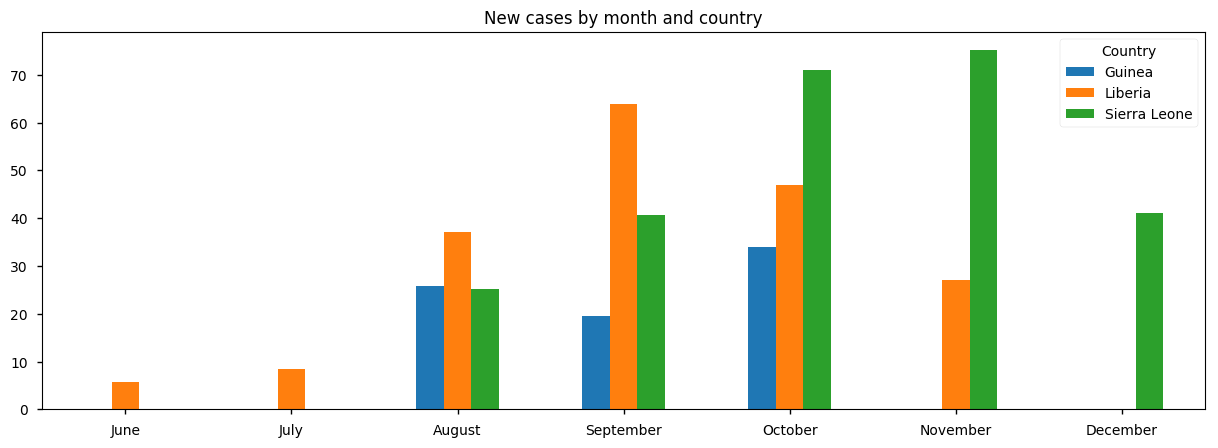

In [102]:
# We plot a histogram for the new cases
histo = casesDF.plot.bar()
histo.set_xticklabels(all_months_names, rotation=0)
histo.set_title('New cases by month and country')
histo.legend(title="Country")

#We delete the temporary dataframe as we do not use it later
del casesDF

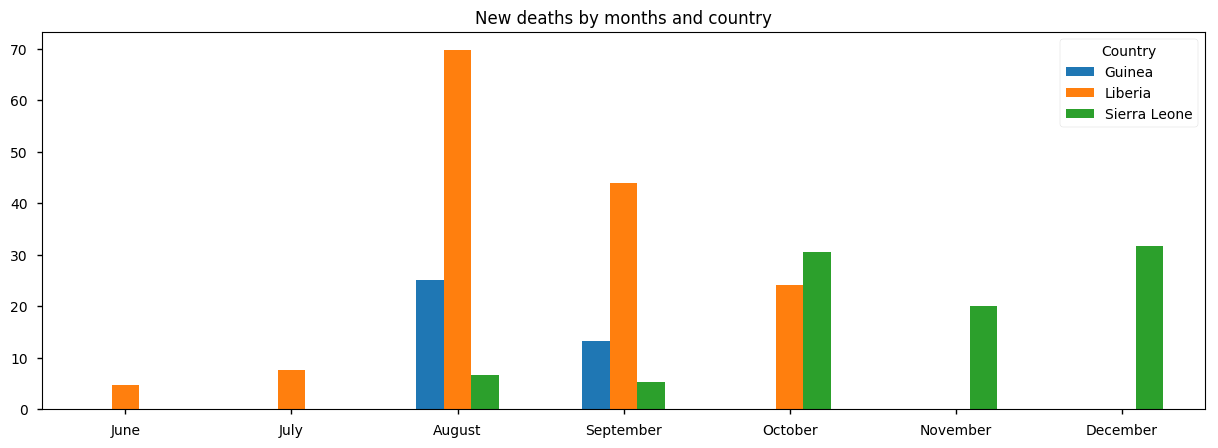

In [85]:
# We plot a histogram for the deaths
histo = deathDF.plot.bar()
histo.set_xticklabels(all_months_names, rotation=0)
histo.set_title('New deaths by months and country')
histo.legend(title="Country")

#We delete the temporary dataframe as we do not use it later
del deathDF

The histograms indicates that the disease started in Liberia and spread to Sierra Leone during the fall. The Guinea data set does not contain much information on other month than August and September, therefore we can not make a conclusive judgement with these data alone.

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

## Answer

We start by importing the 9 spreadsheets in a list of `DataFrame`. The `glob` module is used to get the paths to the excel files, which are contained in the variable `allFiles`.

In [ ]:
import glob

path = DATA_FOLDER + '/microbiome'
allFiles = glob.glob(path + '/MID*.xls')
spreadsheets = [pd.read_excel(file, sheetname='Sheet 1',  header=None, names=['Name', 'Counts']) for file in allFiles]

The `dataframes` are then concatenated into a single `dataframe` using the files name as keys.

In [ ]:
fileID = ['MID' + str(i+1) for i in range(len(allFiles))]
microbeData = pd.concat(spreadsheets,  keys=fileID)

To add the metadata information to the `dataframe`, we first create 2 columns with content "unknown". Then, the metadata file is read and the metadata are added to the `dataframe` using the keys to isolate the data by input file.

In [ ]:
microbeData['GROUP'] = ['unknown']*len(microbeData)
microbeData['SAMPLE'] = ['unknown']*len(microbeData)

microbeMetaData = pd.read_excel(path + '/metadata.xls', index_col='BARCODE')

for barcode in microbeMetaData.index:
    microbeData.loc[barcode, 'GROUP'] = microbeMetaData.loc[barcode,'GROUP']
    microbeData.loc[barcode, 'SAMPLE'] = microbeMetaData.loc[barcode,'SAMPLE']

Finaly, we set the `NaN` values to `unknown` and create a unique hierarchical index using the **group**, **sample** and **name** features

In [ ]:
microbeData.fillna('unknown', inplace=True)

microbeData.set_index(['GROUP', 'SAMPLE','Name'], inplace=True)

In [ ]:
print('Is the index unique ? ' + str(microbeData.index.is_unique))
microbeData

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

### Answer

In [ ]:
DATA_FOLDER = 'Data'
df = pd.read_excel(DATA_FOLDER+'/titanic.xls')
df.head()

For each of the following questions state clearly your assumptions and discuss your findings:


### Question 1 :
Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 

### Answer :
We get information about the columns of the dataframe by using the `describe` method and reading the HTML file which also describes the attributes

In [ ]:
for column in df:
    print(column + ' type : ' +  str(df[column].describe()),end='\n\n')

* **pclass** represents the travel class of a passenger. It is stored as an integer value and can take only 3 values : "1" for 1$^{\text{st}}$ class, "2" for 2$^{\text{nd}}$ class and "3" for 3$^{\text{rd}}$ class.
* **survived** encodes if the passenger survived to the sinking of the Titanic. It is stored as a foating point value which can take only two values : "0" if the passenger did not survived, "1" if he/she did.
* **name** is the name of the passenger. It is stored as a string.
* **sex** encodes the gender of the passenger. It is stored as a string which can take only two values : "female" or "male"
* **age** is the age of the passenger, in year. It is stored as a floating point value, and should be a positive value.
* **sibsp** is the Number of Siblings and Spouses of the passenger aboard the Titanic. It is stored as a floating point value, and should be an positive integer value.
* **parch** is the Number of Parents and children of the passenger aboard the Titanic. It is stored as a floating point value, and should be an positive integer value.
* **ticket** is the ticket number of the passenger. It is stored as a string.
* **fare** is the passenger's fare in British Pound (\243). It is stored as a foating point value and should be positive.
* **cabin** is the passenger's cabine(s). It is stored as a string. The list of possible values is given in the HTML file.
* **embarked** is the Harbor where the passenger embarqued. It is stored as a single character and should be either C for "Cherbourg", Q for "Queenstown or S for "Southampton".
* **boat** is the lifeboat on which the passenger was found after the sinking. It is stored as a string.
* **body** is the body identifiction number of the passenger, if he/she has be found dead after the sinking. It is stored as a floating point value and should be positive.
* **home.dest** is a string containing the home or the destination of the passenger, seperated by a "/".

**Categorical attributes** : We notice that :
- **pclass** can take only 3 different values
- **survived** can take only 2 different values
- **sex** can only take 2 different strings
- **embarked** can only take 3 different character values.

We decided to transforms these attributes into categorical attributes as they have a low number of input possibilites.

In [ ]:
#Transform travel class attribute and rename them to gain clarity in the code
df.pclass = df.pclass.astype('category')
df.pclass = df.pclass.cat.rename_categories(["First", "Second","Third"])

#Transform survived attribute and rename them to gain clarity in the code
df.survived = df.survived.astype('category')
df.survived = df.survived.cat.rename_categories(["Dead", "Survived"])

#Transform sex attribute and rename them to gain clarity in the code
df.sex = df.sex.astype('category')
df.sex = df.sex.cat.rename_categories(["Female","Male"])

#Transform travel class attribute and rename them to gain clarity in the code
df.embarked = df.embarked.astype('category')
df.embarked = df.embarked.cat.rename_categories(["Cherbourg","Queenstown","Southampton"])


### Question 2 : 
Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

### Answer :

In [ ]:
#Plot a bar plot of the travel class distribution with seaborn library
fig = plt.figure(figsize=(4,4), dpi=100)
ax1 = sns.countplot(x="pclass", data=df, palette="Greens_d");
ax1.set(xlabel='Class', ylabel='Count');
ax1.set_title('Number of passenger per travel class');

We can see that the number of third class voyager was clearly higher than the other classes. The proportion of first and second class voyagers was roughly the same.

In [ ]:
#Plot a bar plot of the embarkation port distribution with seaborn library
fig = plt.figure(figsize=(4,4), dpi=100)
ax4 = sns.countplot(x="embarked", data=df, palette="Greens_d");
ax4.set(xlabel='Embarkation city', ylabel='Count');
ax4.set_title('Number of passenger per embarkation harbor');

A large majority of voyagers have embarked at the Southampton port, followed by voyagers from the Cherbourg and finally Queenstown ports.

In [ ]:
#Plot a bar plot of the sex distribution with seaborn library
fig = plt.figure(figsize=(4,4), dpi=100)
ax3 = sns.countplot(x="sex", data=df, palette="Greens_d");
ax3.set(xlabel='Sex', ylabel='Count');
ax3.set_title('Number of passenger per sex');

About two thirds of the passengers were Male.

In [ ]:
#Plot a histogram using matplotlib library, the bins of the histogram are divided into decade
fig = plt.figure(figsize=(4,4), dpi=100)
binwidth = 10;
ax5 = plt.hist(df.age.dropna(), bins=np.arange(min(df.age.dropna()), max(df.age.dropna()) + binwidth, binwidth))
ax5 = plt.xlabel('Age')
ax5 = plt.ylabel('Count')
ax5 = plt.title('Age distribution of the passenger')
#We plotted the age without the NaN values

To plot this histogram, we choose to drop the `NaN` value because they could not be classified into a category. We see that the distribution of age favors middle-aged people between 20 and 40 years old.

### Question 3 : 
Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

### Answer :

In [ ]:
## Function used to plot the raw values and percentages onto the pie charts
def convert_pct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

First we have to extract the first letter of the cabin for each passenger. The first letter represents the floor of the cabin. For the cabin with multiple letter (like "F E46"), we chose only the first letter (here "F") to describe the floor. For people with multiple cabin registered, we only chose the first cabin. We justify this choice by observing that for these people, all their cabins share the same floor.

We also drop the *NaN* values as we can not make an assumption on their floor.

In [ ]:
#Create a list of cabin with only the first letter of the cabin name and drop the NaN values
str_cabin = df.cabin.dropna().astype(str)
#Create a pandas series with this list of floor
str_cabin = pd.Series([cab[0] for cab in str_cabin])
#Add the pandas series to our dataframe
df['floor'] = str_cabin

In [ ]:
#Create a groupby object by using the groupBy command on the floor attributes and compute the number of 
#apparitions of each floor by using the .size() method
floor_freq = df.groupby('floor').size()
#Convert the number of apparitions of each floor into percentage over all floors
floor_freq.apply(lambda x: 100*x/floor_freq.sum())
floor_freq

In [ ]:
#We then plot a pie chart to visualize the distribution of floors
fig = plt.figure(figsize=(10,6), dpi=100)
explode = (0, 0, 0, 0,0,0,0,0.7)
plt_pie_cabin = floor_freq.plot(kind='pie',autopct=convert_pct(floor_freq),cmap = 'Pastel2',explode = explode)
plt_pie_cabin = plt.axis('equal')
plt_pie_cabin = plt.title('Floor distribution')
plt_pie_cabin = plt.ylabel('')

### Question 4 : 
For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
### Answer :

In [ ]:
#First we convert the category bin_survived into integer by using its categorical codes
df['bin_survived'] = df.survived.cat.codes
#We then use the pandas groupby function to compute the proportion of survivors by travel class
proportion_table = df.groupby('pclass').mean()

#The following lines are used to get the number of survivors and the number of dead people to plot
#them more easily inside pie charts
size_of_class = df.groupby('pclass').size()
sum_of_class = df.groupby('pclass').sum()
sum_of_class['number_dead'] = size_of_class - sum_of_class['bin_survived']

#We convert the proportion of survivors per travel class to percentages and print them
print(proportion_table.bin_survived.apply(lambda x: x*100))

In [ ]:
# We plot three pie charts, one for each travel class into a subplot
fig = plt.figure(figsize=(15,5), dpi=100)
fig.suptitle("Proportions of dead and survivors per travel class")

#Pie chart of the proportion of survivors in the first class
ax1 = plt.subplot(131)
values = sum_of_class.loc['First',['bin_survived','number_dead']]
plt.pie(values,autopct=convert_pct(values),colors = ['limegreen','tomato'])
plt.axis('equal')
plt.title('First class')
plt.legend(['Survived','Dead'])

#Pie chart of the proportion of survivors in the second class
ax2 = plt.subplot(132)
values = sum_of_class.loc['Second',['bin_survived','number_dead']]
plt.pie(values,autopct=convert_pct(values),colors = ['limegreen','tomato'])
plt.axis('equal')
plt.title('Second class')
plt.legend(['Survived','Dead'])

#Pie chart of the proportion of survivors in the third class
ax2 = plt.subplot(133)
values = sum_of_class.loc['Third',['bin_survived','number_dead']]
plt.pie(values,autopct=convert_pct(values),colors = ['limegreen','tomato'])
plt.legend(['Survived','Dead']);
plt.axis('equal');
plt.title('Third class');


We can infer some interesting conclusions from these three pie charts. We can see that the proportions of survivors seems to be corelated to the travel class. A first class passenger appears to have a much higher chance to survive than a third class one.

### Question 5 : 
Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

In [ ]:
# We use the groupby method to compute the number of survivors by travel class and sex, we use the .mean() method 
# to get a proportion and then we convert it to percentage
freq_table_grouped = df.groupby(['sex','pclass']).bin_survived.mean()
print(freq_table_grouped.apply(lambda x: x*100))

In [76]:
# We create a temporary dataframe to seperate the two sex, male and female for plotting
df_tmp = pd.DataFrame([freq_table_grouped.loc['Male'].apply(lambda x: x*100),
                       freq_table_grouped.loc['Female'].apply(lambda x: x*100)])

#We plot a bar chart to better visualize the data
ax2 = df_tmp.plot.bar()
ax2.set_xticklabels(('Male', 'Female'), rotation=0)
ax2.set_title('Proportion of passenger that survived by travel class and sex')
ax2.legend(title="Travel class")

#We delete the temporary dataframe as we do not use it later
del df_tmp

NameError: name 'freq_table_grouped' is not defined

As we can see on this bar plot, female passenger have a much higher survival proportion than male passenger. Moreover, an interesting result is that first and second class female passenger have a nearly 100% survival rate. We can infer that during the Titanic evacuation, female passengers were given a priority access to the life boats. 

### Question 6 : 
Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.
### Answer :

In [ ]:
#First we wish to divide the passenger in two age categories (We will call them "Young" and "Old"), we follow
#the next steps

# 1. We sort the dataframe by age and copy it into a new dataframe
df_age_sorted = df.sort_values(ascending=True,by=['age'])
# 2. We drop the *NaN* value for the age as we do not make assumptions on the passenger age
df_age_sorted = df_age_sorted.dropna(subset=['age'])
# 3. We compute the index of the middle of our dataframe
mid_point = df_age_sorted.age.size/2.0
# 4. We create a new attribute "age_category" by setting it to "Young" for the first half of our ordered dataframe
# and "Old" for the second half
age_category = ['Young']*int(np.floor(mid_point)) + ['Old']*int(np.ceil(mid_point))
print('Age at middle point : ' + str(df_age_sorted['age'].values[int(mid_point)]))
df_age_sorted['age_category'] = age_category
# 5. We convert the new attribute to a categorical attribute as it only takes 2 values
df_age_sorted.age_category = df_age_sorted.age_category.astype('category')
# 6. Finally we use the groupby and .mean() methods to compute the survival proportions by age category, travel class
# and sex.
age_class_sex_grouped = df_age_sorted.groupby(['age_category','pclass','sex']).bin_survived.mean()
# We convert the proportions to percentage
age_class_sex_grouped = pd.DataFrame(age_class_sex_grouped).apply(lambda x: x*100)
age_class_sex_grouped = age_class_sex_grouped.rename(columns={'bin_survived': 'survivor_proportion'})
# We check that the index (here a multi-index) is unique
print('Index is unique : ' + str(age_class_sex_grouped.index.is_unique))
# We print the dataframe
age_class_sex_grouped

We can see that the younger passenger (age < 28) have a higher survival rate for every combination of travel class and sex except for the first class female passenger. It can be expected that younger people have a higher survival rate due to their better physical performance and resistance. However, we can see a large difference between the survival rate of the male passengers of second class, depending on their age, but this difference doesn't appear for the women passenger of the same class. This could be an indication that the life boats access were in priority given to womens, independently of their traval class, then to men in ascending order of traveling class. 

Another hyptohesis is that the life boats were more accessible for first class passenger. We could validate this assumption by studying the Titanic's blueprint.

### Conclusion
With this dataset analysis, we can propose some conclusions on the survival rate of multiple categories of passenger.

First, we found that the survival rate seems to be highly correlated to the travel class of the passengers, a first class passenger had a higher chance to survive than a third class one. 

Secondly, we found that female passenger were prioritized during the evacuation of the Titanic, we made this conclusion because the survival rate of women is much higher than for men, especially in the first and second class.

Finally, we also found that young people had a higher survival rate than older people. 

All these conclusions comes from a first analysis of the dataset. To confirm these findings, a much more thorough analysis must be done, for example an analysis of the passenger sex per class can be done to check if the difference in class survival rate is mainly due to the travel class or to the passenger's gender.